# Import pyOpenMS

After installation, you should be able to import pyOpenMS as a package

In [ ]:
import pyopenms

which should now give you access to all of pyOpenMS. You should now be
able to interact with the OpenMS library and, for example, read and
write
[mzML](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-mzML)
files:

In [ ]:
import pyopenms as oms

exp = oms.MSExperiment()
oms.MzMLFile().store("testfile.mzML", exp)

which will create an empty
[mzML](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-mzML)
file called <span class="title-ref">testfile.mzML</span>.

# Using the Help Function

There are multiple ways to get information about the available functions
and methods. We can inspect individual pyOpenMS objects through the
`Python` `help` function:

In [ ]:
help(oms.MSExperiment)

``` output
class MSExperiment(builtins.object)
 |  Cython implementation of _MSExperiment
 |   -- Inherits from ['ExperimentalSettings', 'RangeManager2']
 |  
 |  In-Memory representation of a mass spectrometry experiment.
 |  -----
 |  Contains the data and metadata of an experiment performed with an MS (or
 |  HPLC and MS). This representation of an MS experiment is organized as list
 |  of spectra and chromatograms and provides an in-memory representation of
 |  popular mass-spectrometric file formats such as mzXML or mzML. The
 |  meta-data associated with an experiment is contained in
 |  ExperimentalSettings (by inheritance) while the raw data (as well as
 |  spectra and chromatogram level meta data) is stored in objects of type
 |  MSSpectrum and MSChromatogram, which are accessible through the getSpectrum
 |  and getChromatogram functions.
 |  -----
 |  Spectra can be accessed by direct iteration or by getSpectrum(),
 |  while chromatograms are accessed through getChromatogram().
 |  See help(ExperimentalSettings) for information about meta-data.
 |  
 |  Methods defined here:

 [...]
```

which lists information on the
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
class, including a description of the main purpose of the class and how
the class is intended to be used. Additional useful information is
presented in the `Inherits from` section which points to additional
classes that act as base classes to
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html)
and that contain further information. The list of available methods is
long (but does *not* include methods from the base classes) and reveals
that the class exposes methods such as
[MSExperiment.getNrSpectra](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.getNrSpectra.html)
and
[MSExperiment.getSpectrum(id)](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.getSpectrum(id).html)
where the argument `id` indicates the spectrum identifier. The command
also lists the signature for each function, allowing users to identify
the function arguments and return types. We can gain further information
about exposed methods by investigating the documentation of the base
classes:

In [ ]:
help(oms.ExperimentalSettings)

``` output
Help on class ExperimentalSettings in module pyopenms.pyopenms_4:

class ExperimentalSettings(builtins.object)
 |  Cython implementation of _ExperimentalSettings
 |   -- Inherits from ['DocumentIdentifier', 'MetaInfoInterface']
 |  
 |  Description of the experimental settings, provides meta-information
 |  about an LC-MS/MS injection.
 |  
 |  Methods defined here:

 [...]
```

We could now continue our investigation by reading the documentation of
the base classes
[DocumentIdentifier](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.DocumentIdentifier.html)
and
[MetaInfoInterface](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MetaInfoInterface.html),
but we will leave this exercise for the interested reader. For a more
complete documentation of the underlying wrapped methods, please consult
the official OpenMS documentation, in this case the [MSExperiment
documentation](https://abibuilder.cs.uni-tuebingen.de/archive/openms/Documentation/release/latest/html/classOpenMS_1_1MSExperiment.html).

# First Look at Data

## File Reading

pyOpenMS supports a variety of different files through the
implementations in OpenMS. In order to read mass spectrometric data, we
can download the
[mzML](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-mzML)
example file:

In [ ]:
from urllib.request import urlretrieve

# download small example file
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/tiny.mzML", "tiny.mzML")
exp = oms.MSExperiment()
# load example file
oms.MzMLFile().load("tiny.mzML", exp)

which will load the content of the `tiny.mzML` file into the `exp`
variable of type
[MSExperiment](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.html).
We can now inspect the properties of this object:

In [ ]:
help(exp)

``` output
class MSExperiment(builtins.object)
 |  Cython implementation of _MSExperiment
 |   -- Inherits from ['ExperimentalSettings', 'RangeManager2']


 [...]

 |  Methods defined here:

 [...]

 |  getNrChromatograms(...)
 |      Cython signature: size_t getNrChromatograms()
 |
 |  getNrSpectra(...)
 |      Cython signature: size_t getNrSpectra()
 |

 [...]
```

which indicates that the variable `exp` has (among others) the functions
[MSExperiment.getNrSpectra](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.getNrSpectra.html)
and
[MSExperiment.getNrChromatograms](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSExperiment.getNrChromatograms.html).
We can now try these functions:

In [ ]:
print(exp.getNrSpectra())
print(exp.getNrChromatograms())

``` output
4
2
```

and indeed we see that we get information about the underlying MS data.
We can iterate through the spectra as follows:

## Iteration

In [ ]:
for spec in exp:
    print("MS Level:", spec.getMSLevel())

``` output
MS Level: 1
MS Level: 2
MS Level: 1
MS Level: 1
```

This iterates through all available
[MSSpectra](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectra.html),
we can also access spectra through the `[]` operator:

In [ ]:
print("MS Level:", exp[1].getMSLevel())

``` output
MS Level: 2
```

Note that `spec[1]` will access the *second* spectrum (arrays start at
`0`). We can access the raw peaksthrough
[MSSpectrum.get_peaks()](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MSSpectrum.get_peaks().html):

In [ ]:
spec = exp[1]
mz, intensity = spec.get_peaks()
print(sum(intensity))

``` output
110
```

Which will access the data using a numpy array, storing the m/z
information in the mz vector and the intensity in the `i` vector.
Alternatively, we can also iterate over individual peaks objects as
follows (this tends to be slower):

In [ ]:
for peak in spec:
    print(peak.getIntensity())

``` output
20.0
18.0
16.0
14.0
12.0
10.0
8.0
6.0
4.0
2.0
```

## Total Ion Current Calculation

Here, we will apply what we have learned to calculate the total ion
current (TIC). The TIC represents the summed intensity across the entire
range of masses being detected at every point in the analysis.
Basically, we calculate the total ion current of the whole experiment.

With this information, we can write a function that calculates the TIC
for a given MS level:

In [ ]:
# Calculates total ion current of an LC-MS/MS experiment
def calcTIC(exp, mslevel):
    tic = 0
    # Iterate through all spectra of the experiment
    for spec in exp:
        # Only calculate TIC for matching (MS1) spectra
        if spec.getMSLevel() == mslevel:
            mz, i = spec.get_peaks()
            tic += sum(i)
    return tic

To calculate a TIC we would now call the function:

In [ ]:
print(calcTIC(exp, 1))
print(sum([sum(s.get_peaks()[1]) for s in exp if s.getMSLevel() == 1]))
print(calcTIC(exp, 2))

``` output
240.0
240.0
110.0
```

Note how one can compute the same property using list comprehensions in
Python (see line number 3 in the above code which computes the TIC using
filtering properties of Python list comprehensions
(`s.getMSLevel() == 1`) and computes the sum over all peaks(right `sum`)
and the sum over all spectra (left `sum`) to retrieve the TIC).

## Total Ion Current Chromatogram

The total ion current is visualized over the retention time, to allow
for the inspection of areas with general high intensity (usually
multiple analytes were measured there). This can help the
experimentalist to optimize the chromatography for a better separation
in a specific area.

While some
[mzML](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-mzML)
files already contain a pre-computed total ion current chromatogram
(TIC), we will show you how to calculate the TIC for
[MS1](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS1).
One can access the retention times and intensities of the TIC in
different ways and generate a total ion current chromatogram (2D graph)
using `matplotlib`:

In [ ]:
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

# retrieve MS data
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(
    gh + "/src/data/FeatureFinderMetaboIdent_1_input.mzML", "ms_data.mzML"
)

# load MS data into MSExperiment()
exp = oms.MSExperiment()
oms.MzMLFile().load("ms_data.mzML", exp)

# choose one of the following three methods to access the TIC data
# 1) recalculate TIC data with the calculateTIC() function
tic = exp.calculateTIC()
retention_times, intensities = tic.get_peaks()

# 2) get TIC data using list comprehensions
retention_times = [spec.getRT() for spec in exp]
intensities = [
    sum(spec.get_peaks()[1]) for spec in exp if spec.getMSLevel() == 1
]

# 3) get TIC data looping over spectra in MSExperiment()
retention_times = []
intensities = []
for spec in exp:
    if spec.getMSLevel() == 1:
        retention_times.append(spec.getRT())
        intensities.append(sum(spec.get_peaks()[1]))

# plot retention times and intensities and add labels
plt.plot(retention_times, intensities)

plt.title("TIC")
plt.xlabel("time (s)")
plt.ylabel("intensity (cps)")

plt.show()

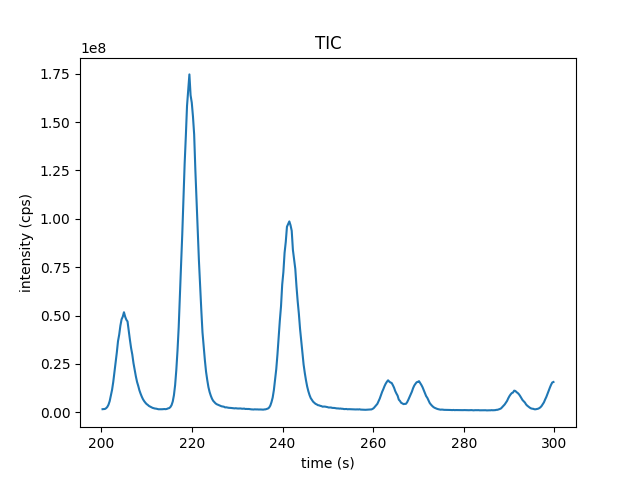